# Monopoly i kako pobjediti

Ako igramo Monopoly znamo da osim kupnje i prodaje ima i puno bacanja kockica. Imamo dvije kockice, pa idemo vidjeti kako izgleda bacanje kockica.

Uvedimo funkciju koja simulira bacanje, funkciju koja simulira više bacanja kockica i funkciju koja će te rezultate upisat u neku listu.

In [1]:
import random

def jedno_bacanje():
    kockica_1 = random.randint(1, 6)
    kockica_2 = random.randint(1, 6)
    return kockica_1 + kockica_2

def bacanje_kockica(broj_bacanja):
    popis_rezultata_bacanja=[]
    for i in range(broj_bacanja):
        rezultat_bacanja = jedno_bacanje()
        popis_rezultata_bacanja.append(rezultat_bacanja)
    return popis_rezultata_bacanja

def lista_dobivenih_brojeva_bacanjem(popis_rezultata_bacanja):
    lista_dobivenih_bacanja=[]
    for i in range(2,13):
        lista_dobivenih_bacanja.append(popis_rezultata_bacanja.count(i))
    
    return lista_dobivenih_bacanja

Sada kada imamo te funkcije možemo napraviti dataframe i napuniti ga sa sljedećim podacima:
* index će nam biti broj koji možemo dobiti kada bacamo 2 kockice
* Broj dobivenih bacanja je koliko puta dobijemo koji broj nakon bacanja dvije kockice na 100 tisuća bacanja
* Broj kombinacija je baš to, broj kombinacija kockica koji nam donosi određeni broj (npr. 4 možemo dobiti na 3 načina, a to su 1 i 3, 2 i 2, 3 i 1)
* i za kraj imamo postotke tih dvaju brojeva

In [2]:
import pandas as pd

tablica_bacanja_kockica = pd.DataFrame(index=['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
tablica_bacanja_kockica['Broj dobivenih bacanja'] = lista_dobivenih_brojeva_bacanjem(bacanje_kockica(100000))
tablica_bacanja_kockica['Broj kombinacija'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
tablica_bacanja_kockica['Postotak dobivenih bacanja'] = tablica_bacanja_kockica['Broj dobivenih bacanja']/1000
tablica_bacanja_kockica['Postotak kombinacija'] = tablica_bacanja_kockica['Broj kombinacija']/36*100
tablica_bacanja_kockica

,Broj dobivenih bacanja,Broj kombinacija,Postotak dobivenih bacanja,Postotak kombinacija
2,2772,1,2.772,2.777778
3,5658,2,5.658,5.555556
4,8320,3,8.320,8.333333
5,11264,4,11.264,11.111111
6,13802,5,13.802,13.888889
7,16614,6,16.614,16.666667
8,13937,5,13.937,13.888889
9,11125,4,11.125,11.111111
10,8264,3,8.264,8.333333
11,5547,2,5.547,5.555556


Ako stavimo te brojeva u dva grafa tako da je u jednom postotak dobivenih bacanja, a u drugoj postotak kombinacija, te bi htjeli dobiti skoro pa identični graf, a kao što vidimo gore iz tablice i dolje iz slike, ta dva grafa su vrlo slična

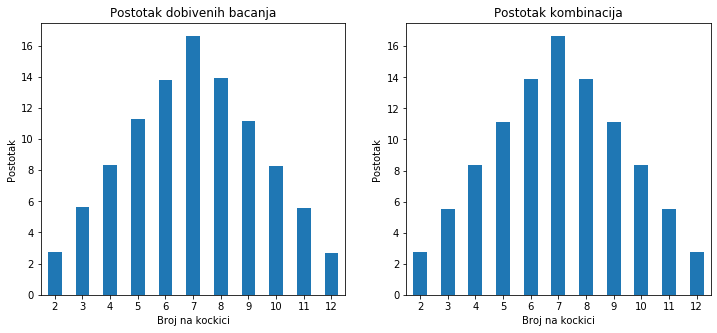

In [3]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Postotak dobivenih bacanja')
ax2.set_title('Postotak kombinacija')
ax1.set_xlabel('Broj na kockici')
ax2.set_xlabel('Broj na kockici')
ax1.set_ylabel('Postotak')
ax2.set_ylabel('Postotak')
tablica_bacanja_kockica['Postotak dobivenih bacanja'].plot(kind='bar', rot=0, ax=ax1, figsize=(12,5))
tablica_bacanja_kockica['Postotak kombinacija'].plot(kind='bar', rot=0, ax=ax2, figsize=(12,5))
plt.show()


Učitajmo csv file gdje imamo sve podatke s Monopoly ploče te zatim obrišimo one koji nam trenutno ne trebaju.

In [4]:
monopoly_board = pd.read_csv('monopoly_board.csv', encoding='utf-8')

In [5]:
del monopoly_board['Space'], monopoly_board['Position'], monopoly_board['Price'], monopoly_board['PriceBuild'], monopoly_board['Rent'], monopoly_board['RentBuild1'], monopoly_board['RentBuild2'], monopoly_board['RentBuild3'], monopoly_board['RentBuild4'], monopoly_board['RentBuild5'], monopoly_board['Number']

Jedna partija je odprilike 50 bacanja jednog igrača. Ponovimo to 10000 puta da vidimo na koje polje bi najčešće stali igrači.

In [6]:
import numpy as np

najcesce_polje = np.empty(40, dtype=np.int32)
najcesce_polje.fill(0)

for i in range(10000):
    trenutno_mjesto=0
    for j in range(50):
        trenutno_mjesto = trenutno_mjesto + jedno_bacanje()
        if trenutno_mjesto>39:
            trenutno_mjesto = trenutno_mjesto % 40
        najcesce_polje[trenutno_mjesto] = najcesce_polje[trenutno_mjesto] + 1
    
najcesce_polje

array([11937, 11779, 11982, 12196, 12566, 12769, 13324, 13488, 13248,
       13092, 12927, 12884, 12829, 13006, 12661, 12798, 12828, 12798,
       12790, 12672, 12470, 12608, 12557, 12468, 12432, 12432, 12520,
       12505, 12117, 12277, 12331, 12327, 12085, 12110, 12127, 11921,
       11956, 12036, 12068, 12079])

No, ovo nije baš točno i precizno. Znamo da u monopolyju postoje različiti načini za doć na neko polje osim random bacanja kockica, pa uzmimo sada i to u obzir.

Imamo Chance kartice, gdje nas 9/16 kartica šalje na neko drugo polje. Napravimo funkciju za izvlačenje kartice.

In [7]:
def chance_cards(pozicija, trenutne_karte):
    
    #ako smo izvukli sve karte moramo ih promiješati opet
    if not trenutne_karte:
        trenutne_karte = ['Advance to Go', 'Illinois', 'St. Charles Place', 'nearest Utility', 
                          'nearest Railroad', 'Go Back Three', 'Go to Jail', 'Reading Railroad', 
                          'Boardwalk', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista']
    
    #izvlačimo kartu
    random_karta = random.choice(trenutne_karte)
    
    #Advance to "Go"
    if random_karta == 'Advance to Go':
        pozicija = 0
        trenutne_karte.remove('Advance to Go')
    #Advance to Illinois Ave.
    if random_karta == 'Illinois':
        pozicija = 24
        trenutne_karte.remove('Illinois')
    #Advance to St. Charles Place
    if random_karta == 'St. Charles Place':
        pozicija = 11
        trenutne_karte.remove('St. Charles Place')
    #Advance token to nearest Utility
    if random_karta == 'nearest Utility':
        if pozicija == 7: pozicija = 15
        if pozicija == 22: pozicija = 25
        if pozicija == 36: pozicija = 5
        trenutne_karte.remove('nearest Utility')
    #Advance token to the nearest Railroad
    if random_karta == 'nearest Railroad':
        if pozicija == 7: pozicija = 12
        if pozicija == 22: pozicija = 28
        trenutne_karte.remove('nearest Railroad')
    #Go Back Three {3} Spaces
    if random_karta == 'Go Back Three':
        pozicija = pozicija - 3
        trenutne_karte.remove('Go Back Three')
    #Go to Jail. Go directly to Jail
    if random_karta == 'Go to Jail':
        pozicija = 30
        trenutne_karte.remove('Go to Jail')
    #Take a trip to Reading Railroad
    if random_karta == 'Reading Railroad':
        pozicija = 5
        trenutne_karte.remove('Reading Railroad')
    #Take a walk on the Boardwalk. Advance token to Boardwalk.
    if random_karta == 'Boardwalk':
        pozicija = 39
        trenutne_karte.remove('Boardwalk')
    #izvućena neka druga karta
    if random_karta == 'Nista':
        trenutne_karte.remove('Nista')
    
    return pozicija       

Imamo i Chest kartice, gdje nas ovaj put samo 2/16 kartica šalje na neko drugo polje. Napravimo funkciju za izvlačenje kartice.

In [8]:
def chest_cards(pozicija, trenutne_karte):
    
    #ako smo izvukli sve karte moramo ih promiješati opet
    if not trenutne_karte:
        trenutne_karte = ['Advance to Go', 'Go to Jail', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 
                        'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista']
    
    #izvlačimo kartu
    random_karta = random.choice(trenutne_karte)
        
    #Advance to Go
    if random_karta == 'Advance to Go':
        pozicija = 0
        trenutne_karte.remove('Advance to Go')
    #Go to Jail
    if random_karta == 'Go to Jail':
        pozicija = 30
        trenutne_karte.remove('Go to Jail')
    #izvućena neka druga karta
    if random_karta == 'Nista':
        trenutne_karte.remove('Nista')
        
    return pozicija  

Sada možemo simulirati prave partije i pratiti gdje će igrač biti na kraju svoga kruga. 
Također, kako bi razlikovali polje broj 10, takozvani Zatvor i Posjete na istom mjestu. Zatvor će nam zapravo biti na polju 'Go to Jail'.

In [9]:
najcesce_polje_napredno = np.empty(40, dtype=np.int32)
najcesce_polje_napredno.fill(0)

for i in range(10000):
    #počinjemo s prvog polja
    trenutno_mjesto=0
    
    #pamti ako dobijemo 2 ista broja na bacanju, 3 puta tako i u zatvor
    dva_ista=0
    
    #sve chest kartice
    trenutne_chest_cards = ['Advance to Go', 'Go to Jail', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 
                            'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista']
    
    #sve chest kartice
    trenutne_chance_cards = ['Advance to Go', 'Illinois', 'St. Charles Place', 'nearest Utility', 
                              'nearest Railroad', 'Go Back Three', 'Go to Jail', 'Reading Railroad', 
                              'Boardwalk', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista']
    
    #simulacija jednog igrača u jednoj partiji
    for j in range(50):
        #ako smo završili u zatvoru, krećemo dalje s drugog mjesta
        if trenutno_mjesto == 30:
            trenutno_mjesto = 10
            #također, češće ćemo iz zatvora izać sa parnim brojevima, imamo 3 bacanja
            for k in range(3):
                kockica_1 = random.randint(1, 6)
                kockica_2 = random.randint(1, 6)
                if kockica_1 == kockica_2:
                    trenutno_mjesto = trenutno_mjesto + kockica_1 + kockica_2
                    if trenutno_mjesto > 39:
                        trenutno_mjesto = trenutno_mjesto % 40
                    najcesce_polje_napredno[trenutno_mjesto] = najcesce_polje_napredno[trenutno_mjesto] + 1
                    break
            
        #bacanje kockica, 3 puta za redom 2 ista broja, idemo u zatvor
        kockica_1 = random.randint(1, 6)
        kockica_2 = random.randint(1, 6)
        if kockica_1 == kockica_2:
            dva_ista = dva_ista + 1
        else: dva_ista = 0
        
        if dva_ista == 3:
            dva_ista = 0
            trenutno_mjesto = 30
        else:
            #pomičemo se onoliko koliko dobijemo na bacanju
            trenutno_mjesto = trenutno_mjesto + kockica_1 + kockica_2
        
        #ako smo prošli start
        if trenutno_mjesto > 39:
            trenutno_mjesto = trenutno_mjesto % 40
            
        #ako smo stali na Chance
        if trenutno_mjesto == 7 or trenutno_mjesto == 22 or trenutno_mjesto == 36:
            trenutno_mjesto = chance_cards(trenutno_mjesto, trenutne_chance_cards)
            
        #ako smo stali na Chest
        if trenutno_mjesto == 2 or trenutno_mjesto == 17 or trenutno_mjesto == 33:
            trenutno_mjesto = chest_cards(trenutno_mjesto, trenutne_chest_cards)
        
        najcesce_polje_napredno[trenutno_mjesto] = najcesce_polje_napredno[trenutno_mjesto] + 1
        
najcesce_polje_napredno

array([14985, 10416,  9491, 11113, 12128, 14865, 12432,  5445, 12786,
       12499, 12148, 14290, 14029, 11900, 13628, 13797, 14811, 12306,
       15321, 14901, 15066, 13932,  7371, 13601, 15826, 14436, 13445,
       13392, 13909, 13050, 19793, 13275, 12739, 11619, 12187, 11833,
        5545, 10630, 10532, 12685])

Stavimo to na graf da vidimo kako izgleda.

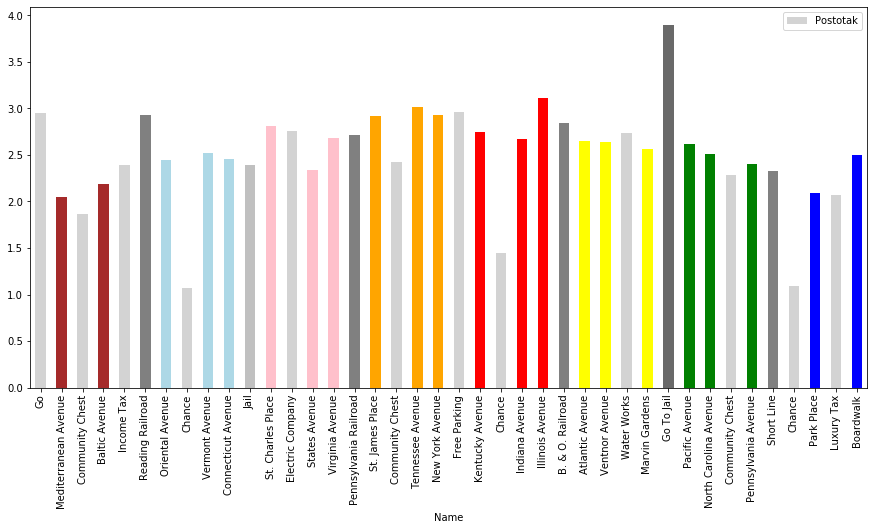

In [10]:
monopoly_board['x-puta'] = najcesce_polje_napredno
monopoly_board['Postotak'] = monopoly_board['x-puta']/monopoly_board['x-puta'].sum()*100

ax3 = monopoly_board.plot.bar(x='Name', y='Postotak', figsize=(15,7), color=monopoly_board['Color'])

Pogledajmo sada samo kraj partije, onda kad je najnapetije, zadnjih 15 bacanja. Onda kada većina ima izgrađene kuće i hotele, gdje je onda najprometnije?

In [11]:
najcesce_polje_endgame = np.empty(40, dtype=np.int32)
najcesce_polje_endgame.fill(0)

for i in range(10000):
    trenutno_mjesto=0
    dva_ista=0
    trenutne_chest_cards = ['Advance to Go', 'Go to Jail', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 
                            'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista']
    trenutne_chance_cards = ['Advance to Go', 'Illinois', 'St. Charles Place', 'nearest Utility', 
                              'nearest Railroad', 'Go Back Three', 'Go to Jail', 'Reading Railroad', 
                              'Boardwalk', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista', 'Nista']
    
    for j in range(50):
        if trenutno_mjesto == 30:
            trenutno_mjesto = 10
            for k in range(3):
                kockica_1 = random.randint(1, 6)
                kockica_2 = random.randint(1, 6)
                if kockica_1 == kockica_2:
                    trenutno_mjesto = trenutno_mjesto + kockica_1 + kockica_2
                    if trenutno_mjesto > 39:
                        trenutno_mjesto = trenutno_mjesto % 40
                    najcesce_polje_endgame[trenutno_mjesto] = najcesce_polje_endgame[trenutno_mjesto] + 1
                    break            
        kockica_1 = random.randint(1, 6)
        kockica_2 = random.randint(1, 6)
        if kockica_1 == kockica_2:
            dva_ista = dva_ista + 1
        else: dva_ista = 0        
        if dva_ista == 3:
            dva_ista = 0
            trenutno_mjesto = 30
        else:
            trenutno_mjesto = trenutno_mjesto + kockica_1 + kockica_2        
        if trenutno_mjesto > 39:
            trenutno_mjesto = trenutno_mjesto % 40            
        if trenutno_mjesto == 7 or trenutno_mjesto == 22 or trenutno_mjesto == 36:
            trenutno_mjesto = chance_cards(trenutno_mjesto, trenutne_chance_cards)            
        if trenutno_mjesto == 2 or trenutno_mjesto == 17 or trenutno_mjesto == 33:
            trenutno_mjesto = chest_cards(trenutno_mjesto, trenutne_chest_cards)
        if j > 34:
            najcesce_polje_endgame[trenutno_mjesto] = najcesce_polje_endgame[trenutno_mjesto] + 1
        
najcesce_polje_endgame

array([4598, 3287, 2775, 3336, 3644, 4326, 3516, 1586, 3491, 3477, 3442,
       4083, 5075, 3467, 4971, 4065, 5250, 3777, 5401, 4377, 5667, 4113,
       3167, 4036, 4912, 4358, 4087, 4112, 4256, 3946, 6061, 3984, 3977,
       3624, 3754, 3717, 1747, 3169, 3450, 4092])

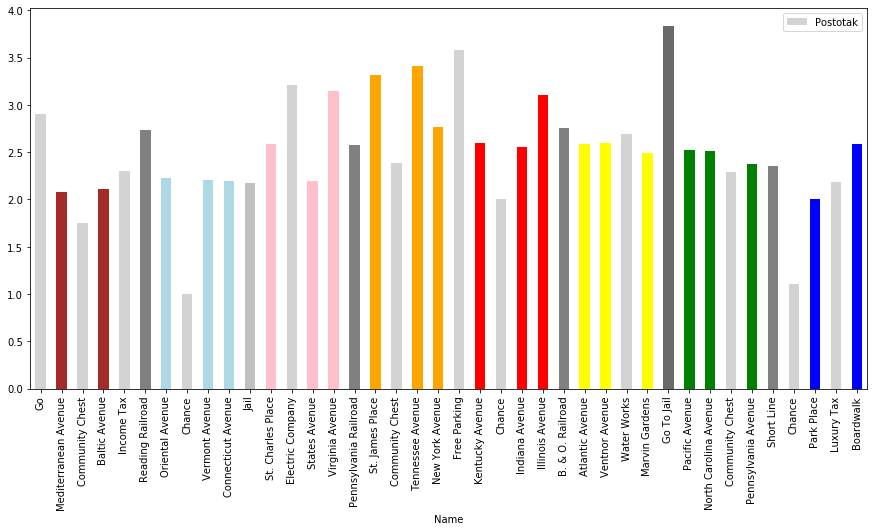

In [12]:
monopoly_board['x-puta'] = najcesce_polje_endgame
monopoly_board['Postotak'] = monopoly_board['x-puta']/monopoly_board['x-puta'].sum()*100

ax3 = monopoly_board.plot.bar(x='Name', y='Postotak', figsize=(15,7), color=monopoly_board['Color'])